In [1]:
#code to look at runs of spr

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
#fname = 'gamescores_battle_zone.dat'
fname = 'gamescores_kangaroo.dat'
dat = pd.read_csv(fname,header=None,names=['name','score'])

In [15]:
dat = dat.iloc[4:,:]
dat = dat[dat['score'] != ' |']

In [29]:
#jump_idx = 2 #for underscored games

jump_idx = 1 #for non-underscored games
seed_idx = jump_idx +1

dat['jump'] = np.array([int(k.split('_')[jump_idx][1:]) for k in dat['name']])
dat['seed'] = np.array([int(k.split('_')[seed_idx]) for k in dat['name']])
dat['score'] = np.array(dat['score']).astype('float')


In [31]:
jumpvec = range(6)
seedvec = range(1,11)
game_mean = np.zeros((len(jumpvec),))
game_sem = np.zeros((len(jumpvec),))

for j in range(len(jumpvec)):
    game_mean[j] = np.mean(dat[dat['jump']==jumpvec[j]]['score'])
    game_sem[j] = np.std(dat[dat['jump']==jumpvec[j]]['score'])/np.sqrt(10)

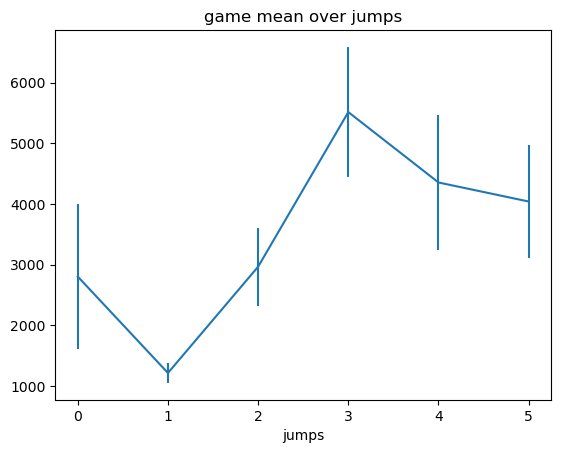

In [32]:
plt.errorbar(jumpvec,game_mean,game_sem)
plt.title('game mean over jumps')
plt.xlabel('jumps')
plt.show()